In [1]:
import os,cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: Tesla M40 24GB (0000:02:00.0)
/home/16mcmi16/anaconda/envs/theano/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
os.listdir('.')

['.mozilla',
 '.bash_logout',
 '.bash_profile',
 '.bashrc',
 '.emacs',
 '.cache',
 '.config',
 '.bash_history',
 '.ipython',
 '.keras',
 '.theano',
 '.rnd',
 '.continuum',
 '.bashrc-miniconda2.bak',
 '.dbus',
 '.conda',
 '.theanorc',
 '.nv',
 '.local',
 '.esd_auth',
 '.gstreamer-0.10',
 'Desktop',
 'perl5',
 'Downloads',
 'anaconda',
 '.emacs.d',
 'Untitled3.ipynb',
 '.pki',
 'Train_img_dataset3.h5',
 'Untitled2.ipynb',
 '.kde',
 '.defaults-0.1.0.ini',
 'own_data_cnn_implementation_keras',
 'Untitled.ipynb',
 '.jupyter',
 '.ipynb_checkpoints',
 '.ssh',
 '.bashrc-anaconda3.bak',
 'Untitled4.ipynb',
 '.python_history',
 'DeepLearning',
 '.pyxbld',
 'data',
 'Untitled1.ipynb',
 '.Xauthority']

In [3]:
f=h5py.File('Train_img_dataset3.h5','r')

In [4]:
print(list(f.keys()))

['train_data']


In [5]:
train_data=list(f.keys())[0]

In [6]:
final_train=f[train_data].shape
print(final_train)

(100000, 64, 64, 3)


In [7]:
img_array=f[train_data]

In [8]:
nd_array=np.asarray(img_array)

In [9]:
nd_array/=255

In [10]:
if K.image_dim_ordering()=='th':
		nd_array=np.rollaxis(nd_array,3,1)
		print (nd_array.shape)

(100000, 3, 64, 64)


In [11]:
# Assigning Labels

# Define the number of classes
num_classes = 200
num_of_samples = img_array.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [12]:
list1=labels.tolist()

In [13]:
i=0
j=0
while(i<num_classes):
    count=0
    while(j<len(list1)) :
        list1[j]=i
        j+=1
        #print(list1[j])
        count=count+1
        if(count==500):
            break
    i+=1        
           
            

In [14]:
labels=np.asarray(list1)

In [15]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [16]:
#Shuffle the dataset
x,y = shuffle(nd_array,Y, random_state=2)

In [17]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [18]:
# Defining the model
input_shape=nd_array[0].shape
print(input_shape)

(3, 64, 64)


In [19]:

#model.add(Convolution2D(64, 3,3,border_mode='same',input_shape=input_shape))
#model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

#model.add(Convolution2D(128, 3, 3))
#model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

#model.add(Flatten())
#model.add(Dense(128))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes))
#model.add(Activation('softmax'))

model = Sequential()
model.add(Convolution2D(64, 3, 3, border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D( 64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense( 256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense( num_classes))
model.add(Activation('softmax'))

/home/16mcmi16/anaconda/envs/theano/lib/python3.5/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same", input_shape=(3, 64, 64...)`
/home/16mcmi16/anaconda/envs/theano/lib/python3.5/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 62, 62)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 62, 62)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 31, 31)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 31, 31)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
__________

In [21]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [22]:
# Training
hist = model.fit(X_train, y_train, batch_size=16, epochs=50, verbose=1, validation_data=(X_test, y_test))

#hist = model.fit(X_train, y_train, batch_size=32, epochs=20,verbose=1, validation_split=0.2)

Train on 80000 samples, validate on 20000 samples
Epoch 1/50
80000/80000 [==============================] - 132s - loss: 5.1520 - acc: 0.0166 - val_loss: 4.9590 - val_acc: 0.0333
Epoch 2/50
80000/80000 [==============================] - 134s - loss: 4.8981 - acc: 0.0362 - val_loss: 4.7165 - val_acc: 0.0585
Epoch 3/50
80000/80000 [==============================] - 133s - loss: 4.6707 - acc: 0.0578 - val_loss: 4.4637 - val_acc: 0.0887
Epoch 4/50
80000/80000 [==============================] - 131s - loss: 4.4430 - acc: 0.0845 - val_loss: 4.3116 - val_acc: 0.1084
Epoch 5/50
80000/80000 [==============================] - 134s - loss: 4.2010 - acc: 0.1129 - val_loss: 4.1867 - val_acc: 0.1197
Epoch 6/50
80000/80000 [==============================] - 134s - loss: 3.9330 - acc: 0.1514 - val_loss: 4.1946 - val_acc: 0.1209
Epoch 7/50
80000/80000 [==============================] - 135s - loss: 3.6287 - acc: 0.1979 - val_loss: 4.2419 - val_acc: 0.1184
Epoch 8/50
80000/80000 [=======================

In [23]:

# Evaluating the model

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])


Test Loss: 6.71924707489
Test accuracy: 0.0734


In [24]:

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

(1, 3, 64, 64)
[[  1.00637117e-05   4.55265791e-07   2.34970526e-06   2.90151274e-06
    1.81056821e-05   1.24717315e-06   8.38633059e-06   7.95254834e-07
    4.84594830e-06   6.06249250e-06   4.71882731e-06   1.15703826e-03
    1.21396873e-03   2.02544543e-04   3.95014195e-06   1.08814038e-05
    2.25003944e-07   3.20395230e-07   6.36382538e-06   1.04717328e-05
    1.99961346e-06   5.02917450e-04   2.12466563e-04   1.01964826e-04
    8.86909856e-06   3.65130603e-04   9.65681102e-05   7.46974139e-04
    5.25833457e-05   5.14729836e-05   2.14450731e-04   8.93777760e-05
    2.44874682e-04   1.89870107e-03   7.82950519e-06   3.36373596e-05
    8.74949765e-05   1.23948962e-06   1.39947429e-06   7.26907786e-07
    3.21545886e-05   1.11075031e-04   1.00920210e-04   1.26140512e-04
    2.53906978e-06   8.13647603e-08   6.94821324e-07   1.12938806e-05
    6.33158430e-04   4.59646290e-05   1.05655854e-05   3.44769105e-05
    1.04545206e-05   9.71285554e-05   2.77489715e-04   1.89134572e-03
    2

In [26]:
# Training with callbacks
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,early_stopping,checkpoint]

hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=50, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Train on 80000 samples, validate on 20000 samples
Epoch 1/50
   80/80000 [..............................] - ETA: 157s - loss: 1.0250 - acc: 0.7375

/home/16mcmi16/anaconda/envs/theano/lib/python3.5/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


80000/80000 [==============================] - 134s - loss: 1.1122 - acc: 0.7408 - val_loss: 6.8141 - val_acc: 0.0690
Epoch 2/50
80000/80000 [==============================] - 133s - loss: 1.0996 - acc: 0.7439 - val_loss: 6.9015 - val_acc: 0.0738


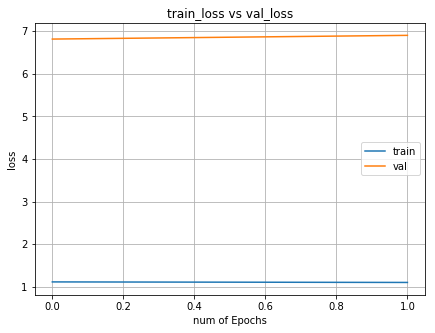

In [27]:


# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(2)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)


plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()



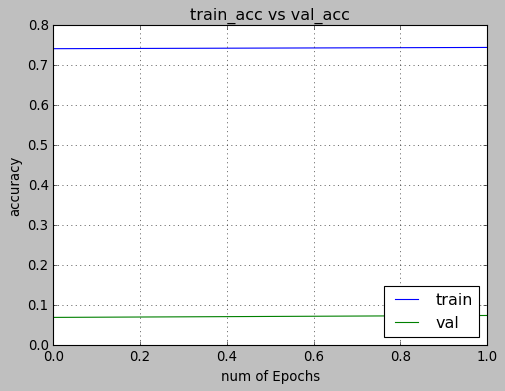

In [28]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)

plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()

In [29]:
# Evaluating the model

score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

Test Loss: 6.90148692169
Test accuracy: 0.0738
(1, 3, 64, 64)
[[  3.80933216e-06   1.84081273e-05   2.39941670e-04   8.77643743e-06
    6.08551374e-04   1.49502317e-04   1.44166144e-04   3.02199605e-05
    5.31490805e-05   8.09447607e-04   2.81519879e-05   2.30546389e-03
    9.92517162e-05   2.47674889e-05   2.19727863e-05   1.83898184e-04
    2.92701941e-07   2.29130528e-04   3.45294143e-06   4.33161331e-05
    4.58181094e-05   3.32270312e-04   3.34589655e-04   6.60918420e-04
    9.32693874e-05   7.26884391e-05   4.10088396e-04   1.23730264e-04
    2.29126708e-05   2.20025213e-05   1.71783268e-02   6.45198952e-03
    3.50349327e-03   7.17869843e-04   7.48347566e-06   3.18355560e-05
    3.98220982e-06   8.65266265e-05   2.08979168e-06   4.02724936e-06
    3.28864146e-04   3.02683134e-06   9.72302369e-05   3.97349067e-05
    7.80298024e-07   1.14263997e-07   3.68994165e-06   5.79598034e-03
    1.10160955e-03   7.14136055e-04   1.03720304e-04   2.12881458e-03
    2.20464390e-05   2.98141

In [36]:
from PIL import Image
# Testing a new image
test_image = Image.fromarray(f[train_data][0])
#test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
#test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

TypeError: Cannot handle this data type